# Fourier Formalism


## Massive case 

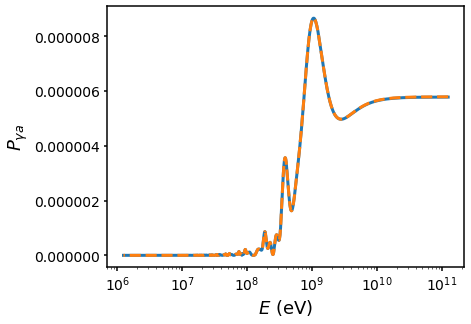

In [20]:
import alpro
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
alpro.util.set_default_plot_params()

s1 = alpro.Survival("1275b")
s1.init_model()
s1.set_params(1e-14 * 1e-9, 1e-9)
s1.set_coherence_r0(None)
s1.domain.create_box_array(100.0, 0, 10.0, r0=0)

s2 = alpro.Survival("1275b")
s2.init_model()
s2.set_params(1e-14 * 1e-9, 1e-9)
s2.set_coherence_r0(None)
s2.domain.create_box_array(100.0, 0, 10.0, r0=0)

E, P2 = s1.propagate_fourier(s1.domain, pol="both", mode="auto", N=100000, f_res = 2000)
_ = s1.default_plot()

P1, _ = s2.propagate(s2.domain, energies=E, pol="both")
_ = plt.plot(E, P1, ls="--", c="C1")

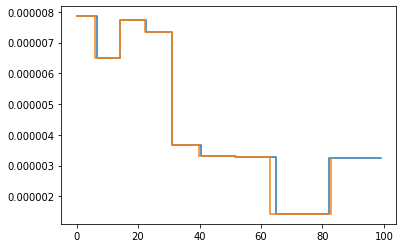

In [10]:

plt.step(s1.domain.r, s1.domain.B, where="post")
plt.step(s2.domain.r, s2.domain.B, where="post")

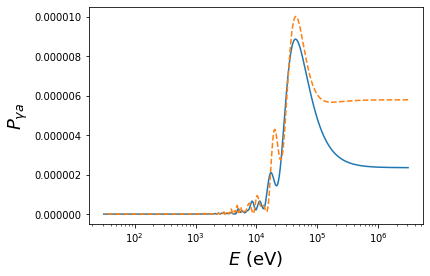

In [18]:
s1 = alpro.Survival("1275b")
s1.init_model()
s1.set_params(1e-14 * 1e-9, 1e-13)
s1.set_coherence_r0(None)
s1.domain.create_box_array(100.0, 0, 10.0, r0=0)

s2 = alpro.Survival("1275b")
s2.init_model()
s2.set_params(1e-14 * 1e-9, 1e-13)
s2.set_coherence_r0(None)
s2.domain.create_box_array(100.0, 0, 10.0, r0=0)

E, P2 = s1.propagate_fourier(s1.domain, pol="both", mode="auto", N=100000, f_res = 200)
_ = s1.default_plot()

P1, _ = s2.propagate(s2.domain, energies=E, pol="both")
_ = plt.plot(E, P1, ls="--", c="C1")